<a href="https://colab.research.google.com/github/romanfen/F21DL-G6/blob/main/Student_Performance_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set Up

In [1]:
import sys
sys.path
from platform import python_version
assert sys.version_info >= (3, 5)
print(python_version())

3.7.15


In [2]:
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
from pylab import rcParams
import seaborn as sb

In [3]:
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
# Load the data
def load_data():
    url = "https://raw.githubusercontent.com/romanfen/F21DL-G6/main/datasets/Maths.csv"
    return pd.read_csv(url)

students = load_data()
students_cols = list(students.columns)
print(students_cols)

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [6]:
# Look at the data
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
# Describe the data
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
# Analyze the data
students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


The average grade mark for the class sits at around 10 or 11, perfectly average which is to be expected.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b16615990>,
      dtype=object)

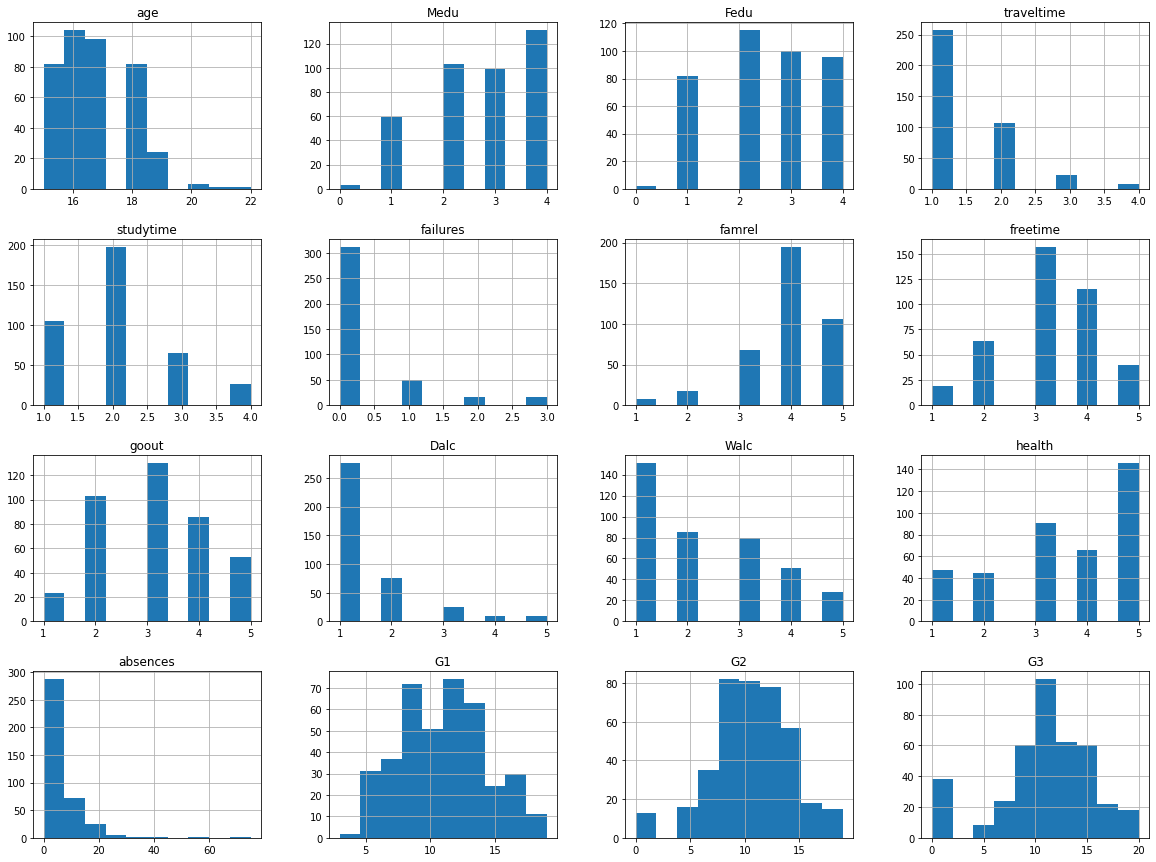

In [9]:
# Look at the data as histograms
students.hist(figsize=(20,15))

In [10]:
# Attribute correlation

corr_matrix = students.corr()
corr_matrix['G3'].sort_values(ascending=False)

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64

# Data Preparation

## Binning

The begin with we bin the G3 results of students into categories of A, B, C or Fail grades.

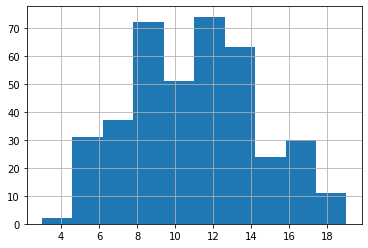

In [11]:
students['G1'].hist()

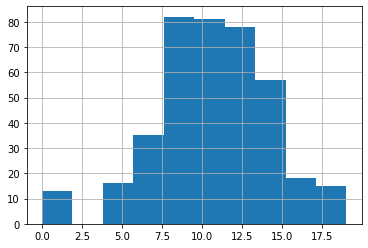

In [12]:
students['G2'].hist()

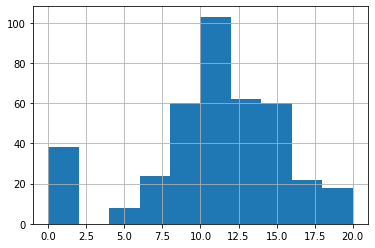

In [13]:
students['G3'].hist()

In [14]:
# Sort Grade 3 results into A,B,C and Fail Grades
# A >= 70%
# B >= 60%
# C >= 50%
# Fail < 70%

def bin_grades(dataset):
  dataset['G3_cat'] = pd.cut(dataset['G3'],
                            bins=[-np.inf, 9.0, 11.0, 13.0, 20],
                            labels=['Fail', 'C', 'B', 'A'])

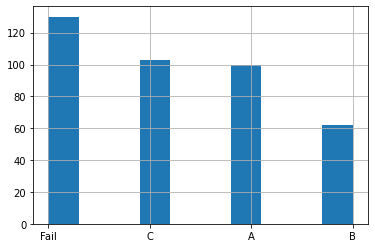

In [15]:
bin_grades(students)
students['G3_cat'].hist()

## Data Subsets

In order to find relationships between the features of our data we will split the data into smaller datasets.

activities_data - This dataset will contain infortmation relating to a students extra-cirricular activities

family_data - This dataset will contain information relating to a students family life.

school_data - This dataset will contain information relating to a students school and study habits.

personal_data - This dataset contains information relating to the invdividuals lifestyle and health

In [16]:
activities_data = students[['activities','romantic','freetime','goout','Dalc','Walc','G1','G2','G3','G3_cat']]
family_data = students[['famsize','Pstatus','Medu','Fedu','Mjob','Fjob','guardian','famsup','internet','G3_cat']]
school_data = students[['school','studytime','failures','schoolsup','paid','nursery','higher','absences','G3_cat']]#,'G1','G2','G3','G3_cat']]
personal_data = students[['school','sex','age','Dalc','Walc','health','absences','G1','G2','G3','G3_cat']]

subsets = [activities_data, family_data, school_data, personal_data]

In [17]:
for set in subsets:
  print(set)

    activities romantic  freetime  goout  Dalc  Walc  G1  G2  G3 G3_cat
0           no       no         3      4     1     1   5   6   6   Fail
1           no       no         3      3     1     1   5   5   6   Fail
2           no       no         3      2     2     3   7   8  10      C
3          yes      yes         2      2     1     1  15  14  15      A
4           no       no         3      2     1     2   6  10  10      C
..         ...      ...       ...    ...   ...   ...  ..  ..  ..    ...
390         no       no         5      4     4     5   9   9   9   Fail
391         no       no         4      5     3     4  14  16  16      A
392         no       no         5      3     3     3  10   8   7   Fail
393         no       no         4      1     3     4  11  12  10      C
394         no       no         2      3     3     3   8   9   9   Fail

[395 rows x 10 columns]
    famsize Pstatus  Medu  Fedu      Mjob      Fjob guardian famsup internet  \
0       GT3       A     4     4

## Stratified Splitting

In [18]:
# Can also do stratified data split
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

def split_dataset(data):
  for train_index, test_index in split.split(data, data["G3_cat"]):
      strat_train_set = data.loc[train_index]
      strat_test_set = data.loc[test_index]
  return strat_train_set, strat_test_set

In [19]:
activities_train, activities_test = split_dataset(activities_data)
activities_target = activities_train['G3_cat'].copy()

family_train, family_test = split_dataset(family_data)
family_target = family_train['G3_cat'].copy()
family_train, family_test = family_train.drop(['G3_cat'], axis=1), family_test.drop(['G3_cat'], axis=1)

school_train, school_test = split_dataset(school_data)
school_target = school_train['G3_cat'].copy()
school_train, school_test = school_train.drop(['G3_cat'], axis=1), school_test.drop(['G3_cat'], axis=1)

personal_train, personal_test = split_dataset(personal_data)
personal_target = personal_train['G3_cat'].copy()

In [39]:
family_train

,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,famsup,internet
107,GT3,T,3,3,services,other,father,yes,yes
355,GT3,T,3,3,services,services,father,yes,no
121,GT3,T,2,2,services,services,father,yes,yes
36,LE3,T,4,3,teacher,services,mother,yes,yes
112,GT3,T,2,2,at_home,other,mother,no,yes
...,...,...,...,...,...,...,...,...,...
46,LE3,A,3,3,other,services,mother,yes,yes
278,GT3,T,4,4,health,health,father,yes,yes
96,GT3,T,4,3,services,other,mother,yes,yes
126,LE3,A,3,4,other,other,mother,no,yes


In [40]:
family_test

,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,famsup,internet
92,LE3,T,3,1,other,other,father,yes,no
56,GT3,A,4,3,services,services,mother,yes,yes
362,GT3,T,3,3,services,services,mother,yes,yes
160,LE3,T,2,1,at_home,other,mother,no,yes
225,GT3,T,3,1,other,other,mother,no,yes
...,...,...,...,...,...,...,...,...,...
357,LE3,A,3,2,services,other,mother,no,no
295,GT3,T,3,3,health,other,mother,yes,yes
331,GT3,T,2,4,at_home,other,father,yes,yes
236,LE3,T,2,2,other,other,father,no,yes


This sections makes sure that all of the datasets have proportional classes

## Pipeline

In [21]:
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

def get_types(dataset):
  num_attr = list(dataset.select_dtypes(include='number'))
  cat_attr = list(dataset.select_dtypes(exclude='number'))
  print(num_attr, cat_attr)
  return num_attr, cat_attr

act_num, act_cat = get_types(activities_data)
prsnl_num, prsnl_cat = get_types(personal_data)
school_num, school_cat = get_types(school_train)
fam_num, fam_cat = get_types(family_train)

num_pipeline = Pipeline([
      ('MnMx_scaler', MinMaxScaler()),
  ])
cat_pipeline = OrdinalEncoder()

full_pipeline =  ColumnTransformer(
    transformers=[
        ("num", num_pipeline, fam_num),#  Apply the numerical transformation to the all numeric columns
        ("cat", cat_pipeline, fam_cat), # Apply the One Hot Encoding to the all categorical columns
  ])

['freetime', 'goout', 'Dalc', 'Walc', 'G1', 'G2', 'G3'] ['activities', 'romantic', 'G3_cat']
['age', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'] ['school', 'sex', 'G3_cat']
['studytime', 'failures', 'absences'] ['school', 'schoolsup', 'paid', 'nursery', 'higher']
['Medu', 'Fedu'] ['famsize', 'Pstatus', 'Mjob', 'Fjob', 'guardian', 'famsup', 'internet']


In [22]:
temp = personal_train.drop(['school','sex','age','Dalc','Walc','health','G3_cat'],axis=1)
temp

,absences,G1,G2,G3
107,2,16,18,18
355,0,10,9,9
121,6,16,14,15
36,2,15,16,18
112,6,10,13,13
...,...,...,...,...
46,12,11,12,11
278,15,9,8,8
96,2,11,15,15
126,0,7,10,11


In [41]:
"""activities_prep = full_pipeline.fit_transform(activities_train)"""
"""personal_prep = num_pipeline.fit_transform(temp)"""
#school_prep = full_pipeline.fit_transform(school_train)
fam_prep = full_pipeline.fit_transform(family_train)

print(family_test.head())
print(fam_prep[3])

    famsize Pstatus  Medu  Fedu      Mjob      Fjob guardian famsup internet
92      LE3       T     3     1     other     other   father    yes       no
56      GT3       A     4     3  services  services   mother    yes      yes
362     GT3       T     3     3  services  services   mother    yes      yes
160     LE3       T     2     1   at_home     other   mother     no      yes
225     GT3       T     3     1     other     other   mother     no      yes
[1.   0.75 1.   1.   4.   3.   1.   1.   1.  ]


Since numerical encoding is done first the features are listed in order:
studytime, failures, absences, G1, G2, school, schoolsup, paid, nursery, higher

# Regression Models

These Models will test for G3 exact grades

##Linear Regression Model


In [ ]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression

def lin_model(data, labels):
  lin_reg = LinearRegression()
  lin_reg.fit(data, labels)

lin_model(activities_prep, activities_labels)

NameError: name 'activities_prep' is not defined

##Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error

grade_predictions = lin_reg.predict(students_prepared)
lin_mse = mean_squared_error(students_labels, grade_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

##Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(students_prepared, students_labels)

In [ ]:
grade_predictions = tree_reg.predict(students_prepared)
tree_mse = mean_squared_error(students_labels, grade_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

##Evaluation Using Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree_reg, students_prepared, students_labels,
                         scoring="neg_mean_squared_error", cv=10)   # 10 folds are tested
tree_rmse_scores = np.sqrt(-tree_scores)

In [ ]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

In [ ]:
lin_scores = cross_val_score(lin_reg, students_prepared, students_labels,
                             scoring="neg_mean_squared_error", cv=10) # 10 folds are tested
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

#Classification Models

***Predicting a grade the student will get from A,B,C or Fail***

In [ ]:
act_grade_A = (activities_train['G3_cat'] == 'A')

act_grade_A

##Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(activities_prep, act_grade_A)

In [ ]:
# Our classifier was set to predict whether a student would recieve an A grade on their final exam of the year
sgd_clf.predict(activities_prep)

# Bayesian Learning and Bayes Nets

Imports

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB

Multinomial

In [ ]:
# For this to work, needed the change the scaler used in the pipeline: Standard -> MinMax
multiNBModel = MultinomialNB()
multiNBModel.fit(students_prepared, students_grade_A)

multiNBModel.predict(students_prepared)

Gaussian

In [ ]:
gausNBModel = GaussianNB()
gausNBModel.fit(students_prepared, students_grade_A)

gausNBModel.predict(students_prepared)

Complement

In [ ]:
compNBModel = ComplementNB()
compNBModel.fit(students_prepared, students_grade_A)

compNBModel.predict(students_prepared)

Bernoulli

In [ ]:
bernNBModel = BernoulliNB()
bernNBModel.fit(students_prepared, students_grade_A)

bernNBModel.predict(students_prepared)

Categorical

In [ ]:
catNB = CategoricalNB()
catNB.fit(students_prepared, students_grade_A)

catNB.predict(students_prepared)

#Clustering

##K-Means Algorithms

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=2)
y_pred = kmeans.fit_predict(personal_prep)

In [ ]:
y_pred

Clusters are in multiple dimensions as shown below.

In [ ]:
kmeans.cluster_centers_

## Plotting

An issue that was discovered when attempting clustering for the first time with this data was the fact that a lot of the data contained identical values. This was due to the original data being formatted categorically or by a scale of 0 - 5

In [ ]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

In [ ]:
plt.figure(figsize=(16, 8))
plot_clusters(personal_prep)
plt.show()

##Voronoi Diagram

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, personal_prep)
plt.show()

## Intertia

Inertia can give us a good measure of the distance between the instances and its centroid

In [ ]:
kmeans.inertia_

In [ ]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k3.fit(personal_prep)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)
kmeans_k8.fit(personal_prep)

In [ ]:
kmeans_k3.inertia_

In [ ]:
kmeans_k8.inertia_

From this the question of how many clusters is best for this example. To figure this out we can use an elbow diagram

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(personal_prep)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [ ]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

This once again points out a problem that was recognised earlier. There is a notable lack of variance in the data that means the data is difficult to cluster.

# Evaluation and Testing

# Decision Trees

studytime[0], failures[1], absences[2], G1[3], G2[4], school[5], schoolsup[6], paid[7], nursery[8], higher[9]

Import packages and set up

In [31]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

# create the decision tree
tree_fam = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_fam.fit(fam_prep, family_target)

DecisionTreeClassifier(max_depth=2, random_state=42)

Lets look at the tree

[Text(0.5, 0.8333333333333334, 'X[0] <= 0.875\ngini = 0.735\nsamples = 316\nvalue = [80, 50, 82, 104]'),
 Text(0.25, 0.5, 'X[0] <= 0.125\ngini = 0.723\nsamples = 212\nvalue = [37, 37, 59, 79]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.721\nsamples = 210\nvalue = [35, 37, 59, 79]'),
 Text(0.75, 0.5, 'X[5] <= 3.5\ngini = 0.707\nsamples = 104\nvalue = [43, 13, 23, 25]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.728\nsamples = 82\nvalue = [29, 12, 20, 21]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.541\nsamples = 22\nvalue = [14, 1, 3, 4]')]

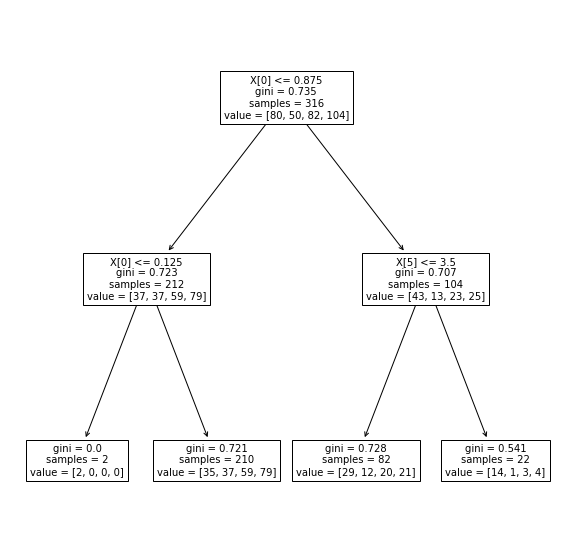

In [33]:
plt.figure(figsize=(10,10))
plot_tree(tree_fam, fontsize=10)

At the restriction of max_depth 2, the tree decides based on grade 2

[Text(0.4230769230769231, 0.875, 'X[0] <= 0.875\ngini = 0.735\nsamples = 316\nvalue = [80, 50, 82, 104]'),
 Text(0.15384615384615385, 0.625, 'X[0] <= 0.125\ngini = 0.723\nsamples = 212\nvalue = [37, 37, 59, 79]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0]'),
 Text(0.23076923076923078, 0.375, 'X[2] <= 0.5\ngini = 0.721\nsamples = 210\nvalue = [35, 37, 59, 79]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.705\nsamples = 153\nvalue = [22, 23, 49, 59]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.734\nsamples = 57\nvalue = [13, 14, 10, 20]'),
 Text(0.6923076923076923, 0.625, 'X[5] <= 3.5\ngini = 0.707\nsamples = 104\nvalue = [43, 13, 23, 25]'),
 Text(0.5384615384615384, 0.375, 'X[4] <= 3.5\ngini = 0.728\nsamples = 82\nvalue = [29, 12, 20, 21]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.684\nsamples = 47\nvalue = [22, 7, 10, 8]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.72\nsamples = 35\nvalue = [7, 5, 10, 13]'),
 Text(0.8461538461538461, 0.375,

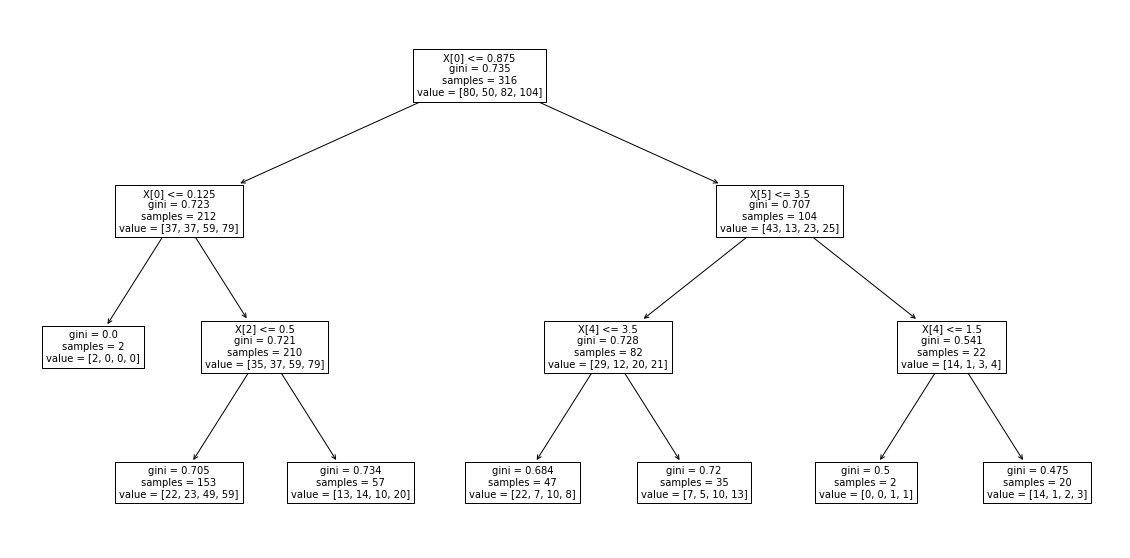

In [34]:
tree_fam_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_fam_3.fit(fam_prep, family_target)

plt.figure(figsize=(20,10))
plot_tree(tree_fam_3, fontsize=10)

Increasing the maximum depth shows a different way the predictions are made, such as the student having attended nursery having some factor

# Accuracy Tests

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [36]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

In [50]:
def testModel(model, test_data, predict):
  train_pred = cross_val_predict(model, test_data, predict, cv=10)
  cM = confusion_matrix(predict, train_pred)
  TPos, FPos, TNeg, FNeg = cM[0][0] , cM[0][1] , cM[1][0] , cM[1][1]
  print("Accuracy :" , np.mean(cross_val_score(model, test_data, predict, cv=10, scoring="accuracy")))
  print("Confusion Matrix: " , cM)
  print("True Positives: " , TPos)
  print("False Positives: " , FPos)
  print("False Negatives: " , FNeg)
  print("True Negatives: " , TNeg)
  print("Sensitivity: " , cM[0][0] / (cM[0][0]+cM[1][0]))
  print("Specificity: " , cM[1][1] / (cM[1][1]+cM[0][1]))
  print("Precision: ", precision_score(predict, train_pred, average='micro'))
  print("Recall: " , recall_score(predict, train_pred, average='micro'))
  print("F1 Score: " , f1_score(predict, train_pred, average='micro'))
  #print("ROC Area: " , roc_auc_score(predict, train_pred))

testModel(tree_fam_3, fam_prep, family_target)

Accuracy : 0.35433467741935487
Confusion Matrix:  [[34  1  6 39]
 [ 9  0  4 37]
 [16  1  8 57]
 [19  1 14 70]]
True Positives:  34
False Positives:  1
False Negatives:  0
True Negatives:  9
Sensitivity:  0.7906976744186046
Specificity:  0.0
Precision:  0.35443037974683544
Recall:  0.35443037974683544
F1 Score:  0.35443037974683544


Naive Bayes Algorithm  | Accuracy | TP | FP | FN | TN | Sensitivity |Specificity | Precision | Recall | F1 Score | ROC Area
-----------|-------|---|--|--|--|-------|-------|-------|-------|-------|------
Mutlinomial|0.75615|230|12|9 |6 |0.77966|0.42857|0.42857|0.12162|0.18947|0.53602
Gaussia    |0.60736|172|70|20|54|0.76106|0.22222|0.22222|0.27027|0.24390|0.4905
Complement |0.59143|160|82|27|47|0.77295|0.24771|0.24771|0.36486|0.29508|0.51301
Bernoulli  |0.72762|215|27|15|59|0.78467|0.35714|0.35714|0.20270|0.25862|0.54557
Categorical|       |   |  |  |  |       |       |       |       |       |
Complex    |       |   |  |  |  |       |       |       |       |       |

In [ ]:
def ROC_Curve(model, data, predict):
  train_pred = cross_val_predict(model, test_data, predict, cv=3)
  fpr, tpr, thresholds = roc_curve(predict, train_pred)
  plt.figure(figsize=(8, 6))                         # Not shown
  plot_roc_curve(fpr, tpr)
  plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
  plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
  plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
  plt.show()